In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
train_data = pd.read_csv('./Datasets/risk_analytics_train.csv',index_col=0)
test_data = pd.read_csv('./Datasets/risk_analytics_test.csv',index_col=0)

In [169]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [170]:
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban


In [171]:
print(train_data.shape)
print(test_data.shape)

(614, 12)
(367, 11)


In [172]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 62.4+ KB
None


In [173]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    float64
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 34.4+ KB
None


In [174]:
print(train_data.isnull().sum(),'\n')
print(test_data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [175]:
# filling null values for categorical columns
list = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Loan_Amount_Term']
for x in list:
    train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    test_data[x].fillna(test_data[x].mode()[0],inplace=True)

In [176]:
train_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [177]:
test_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [178]:
# filling null values for numerical columns
train_data['LoanAmount'].fillna(round(train_data['LoanAmount'].mean(),0),inplace=True)
test_data['LoanAmount'].fillna(round(test_data['LoanAmount'].mean(),0),inplace=True)
train_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [179]:
test_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [180]:
# filling null values for Credit History column
train_data['Credit_History'].fillna(value=0,inplace=True)
test_data['Credit_History'].fillna(value=0,inplace=True)

print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Label Encoding

In [181]:

col = []
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        col.append(i)
col

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col:
    train_data[i] = le.fit_transform(train_data[i])

In [183]:
col = []
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        col.append(i)
col

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [184]:
for i in col:
    test_data[i] = le.fit_transform(test_data[i])
print(test_data.dtypes)

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object


training data

<Axes: >

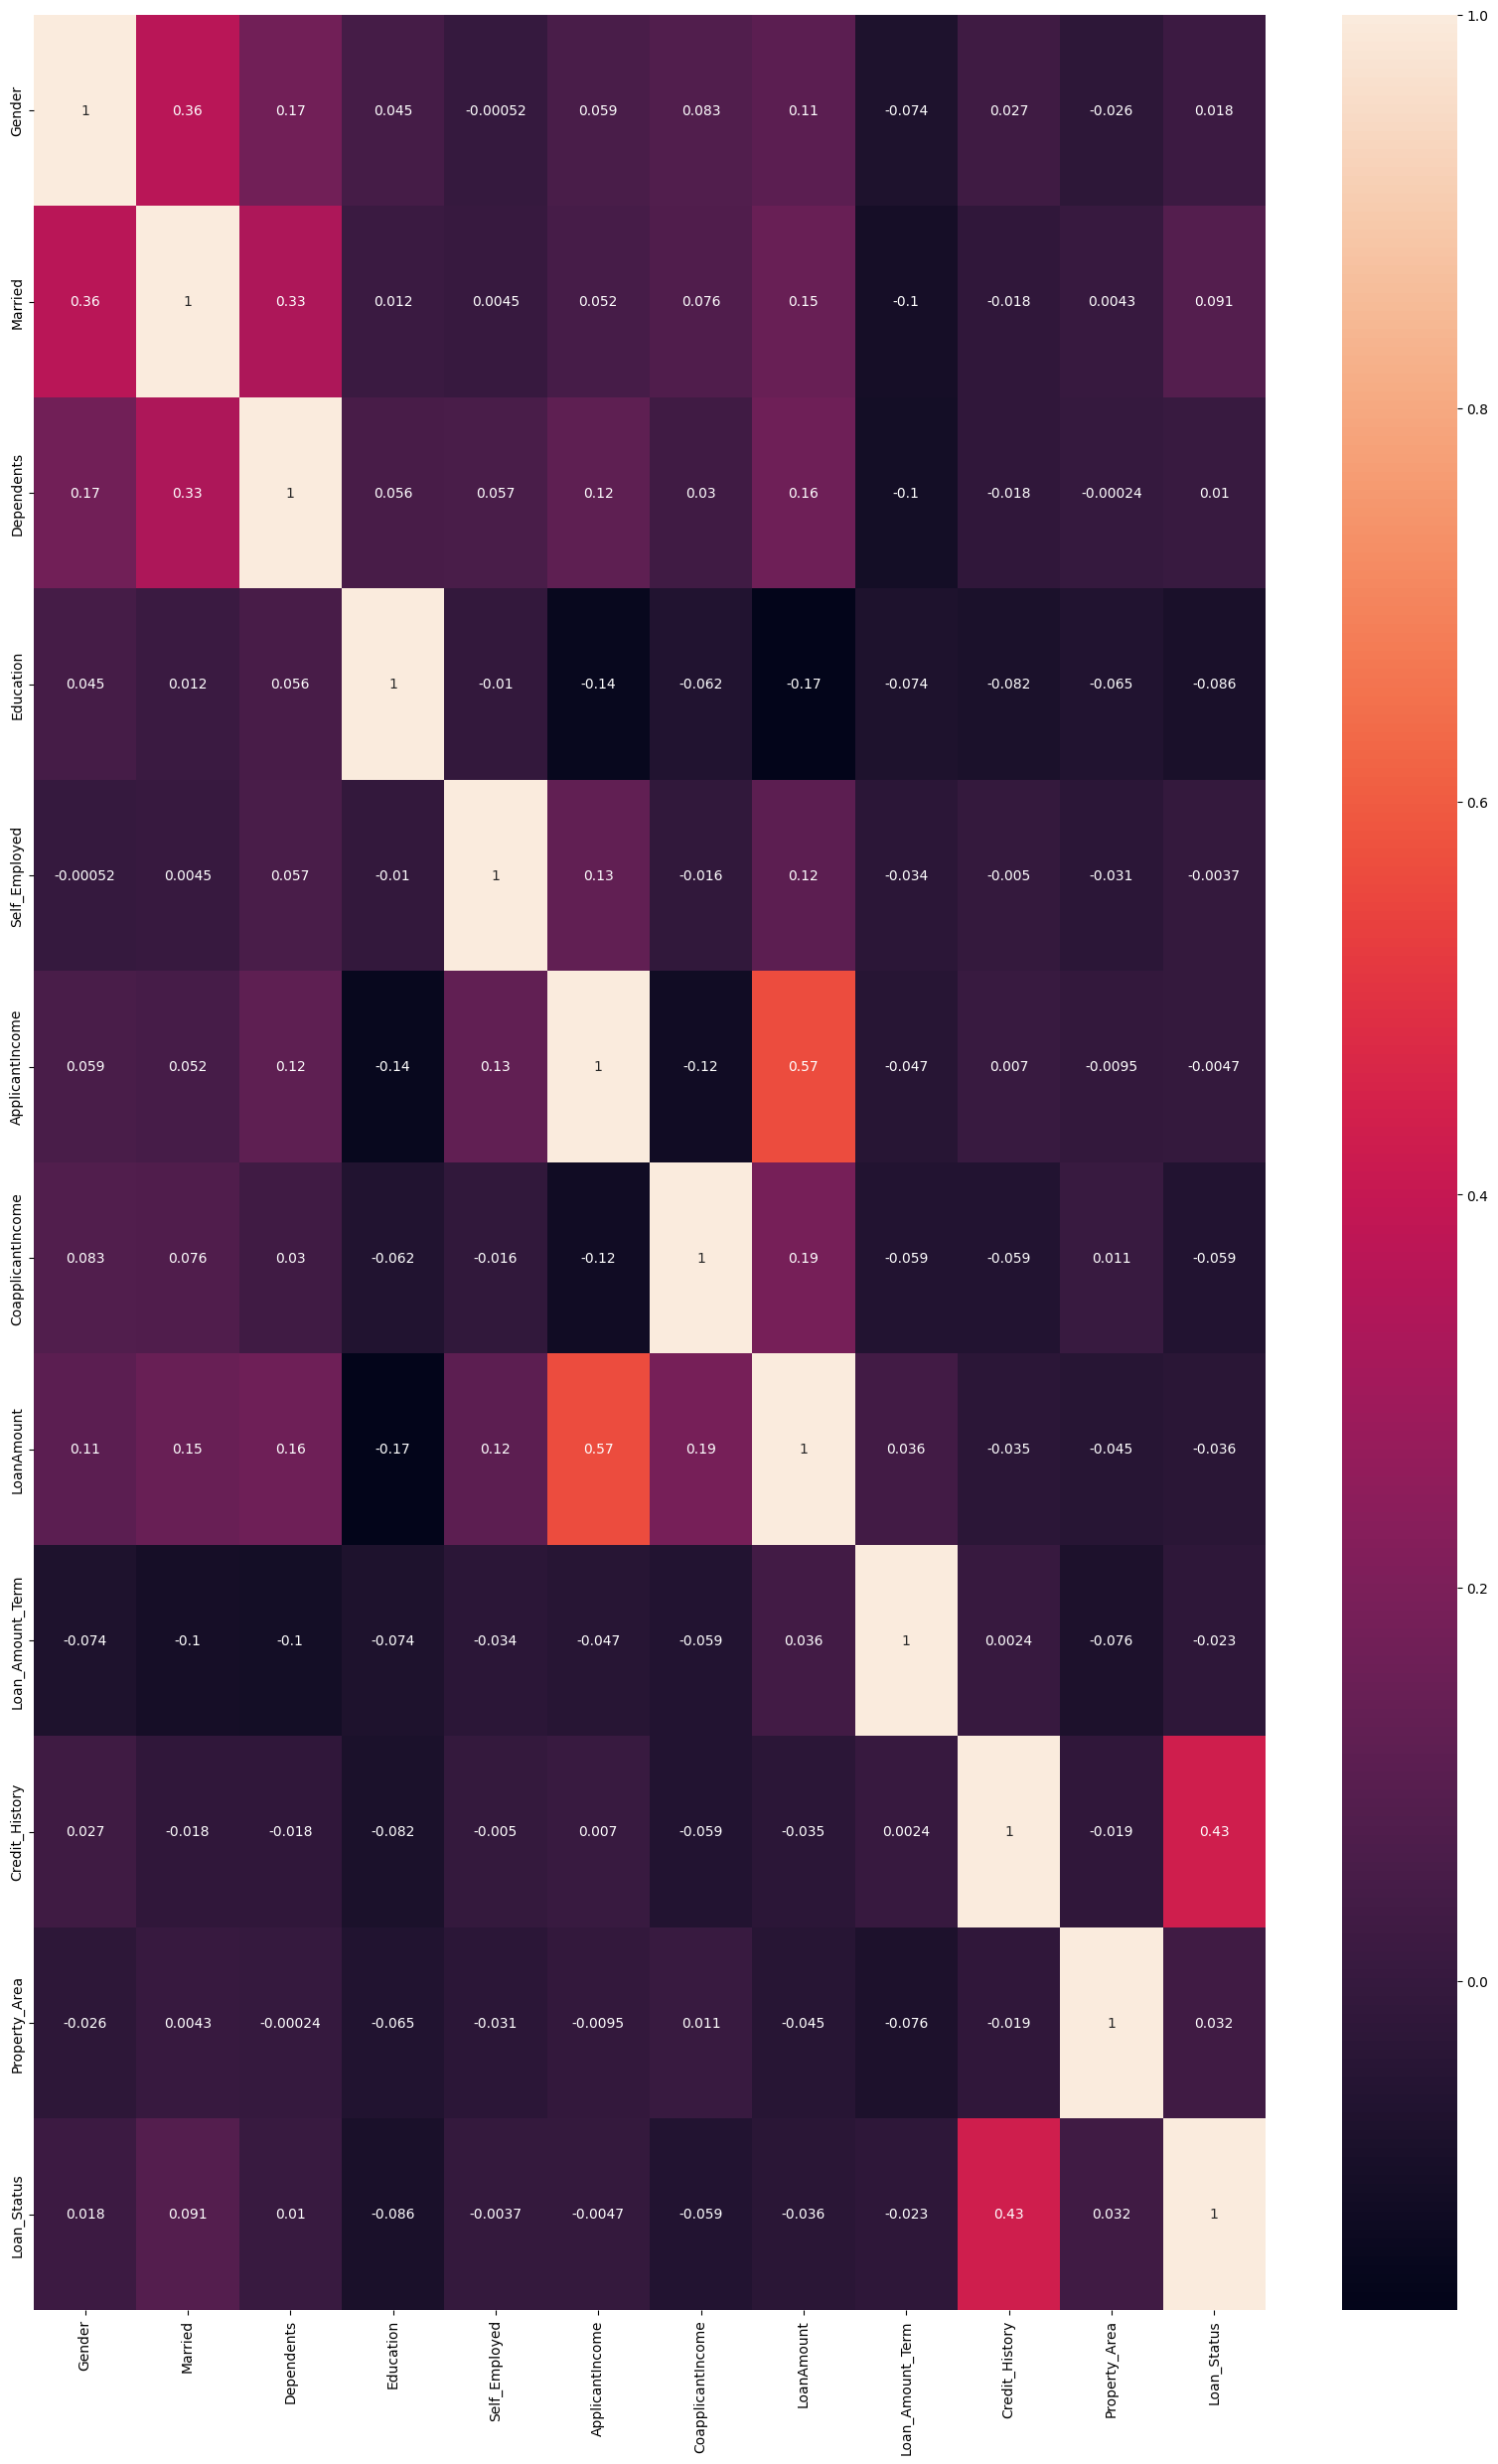

In [185]:
# heatmap visualization
plt.figure(figsize=(20,30))
sns.heatmap(train_data.corr(),annot=True)

## Creating training data and testing data

In [186]:
x_train = train_data.values[:,0:-1]
y_train = train_data.values[:,-1]
y_train = y_train.astype(int)
x_test = test_data.values[:,:]

In [187]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train)


(614, 11)
(614,)
(367, 11)
[[  1.   0.   0. ... 360.   1.   2.]
 [  1.   1.   1. ... 360.   1.   0.]
 [  1.   1.   0. ... 360.   1.   2.]
 ...
 [  1.   1.   1. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   1.   2.]
 [  0.   0.   0. ... 360.   0.   1.]]


### Scaling the data


In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
sc.fit(x_test)
x_test = sc.transform(x_test)

## Importing and fitting the model

In [189]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',C=20,gamma=0.01)
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
y_pred.shape

(367,)

In [190]:
svc_model.score(x_train,y_train)

0.7768729641693811

In [191]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_new = svc_model.predict(x_train)
print('Confusion matrix: \n',confusion_matrix(y_train, y_pred_new))
print('\nclassification report: \n',classification_report(y_train, y_pred_new))

Confusion matrix: 
 [[ 97  95]
 [ 42 380]]

classification report: 
               precision    recall  f1-score   support

           0       0.70      0.51      0.59       192
           1       0.80      0.90      0.85       422

    accuracy                           0.78       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.77      0.78      0.77       614



In [192]:
test_data=pd.read_csv('./Datasets/risk_analytics_test.csv',index_col=0,header=0)
test_data["Y_predictions"]=y_pred
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [193]:
test_data.Y_predictions.value_counts()

Y_predictions
1    279
0     88
Name: count, dtype: int64

In [194]:
# to covert to excel file
# test_data.to_excel(r'./Datasets/risk_analytics_train.csv')
# test_data.Y_predictions.value_counts()